# Task 03 - MINIMAX
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# uncomment following for interactive matplotlib
# %matplotlib notebook
from minimax import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
from PIL import Image

#### Load data from *.npz files

In [4]:
data = np.load("data_33rpz_03_minimax.npz", allow_pickle=True)
alphabet = data["alphabet"]
images_tst = data["images_test"]
labels_tst = data["labels_test"]
cont = data["cont"].item()
discrete = data["discrete"].item()

## Discrete

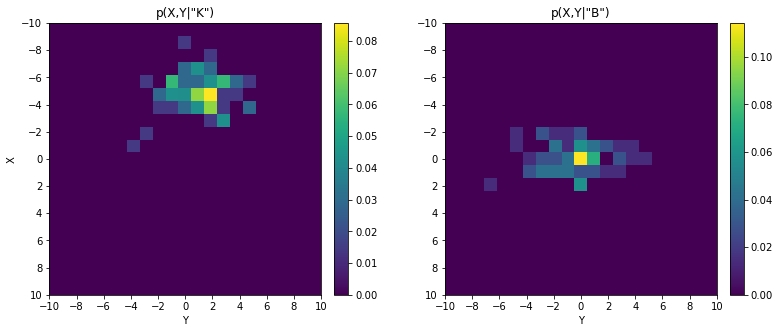

In [5]:
# fill your initials (There are Mirek Dušín and Chuck Norris in the assignment)
letters = "KB"
D1 = discrete[letters[0]].copy()
D2 = discrete[letters[1]].copy()

# plot the distributions
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.imshow(D1, extent=[-10,10,10,-10])
plt.xlabel('Y')
plt.ylabel('X')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('p(X,Y|"' + letters[0] + '")')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.subplot(1, 2, 2)
plt.imshow(D2, extent=[-10,10,10,-10])
plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel('Y')
plt.title('p(X,Y|"' + letters[1] + '")')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig('minimax_distributions_discrete.png')


/Users/karinabalagazova/Desktop/cvut/5.semestr/RPZ/assigments/3_minimax/minimax.py:28: RuntimeWarning: divide by zero encountered in true_divide
  lr = distribution1/distribution2
/Users/karinabalagazova/Desktop/cvut/5.semestr/RPZ/assigments/3_minimax/minimax.py:28: RuntimeWarning: invalid value encountered in true_divide
  lr = distribution1/distribution2


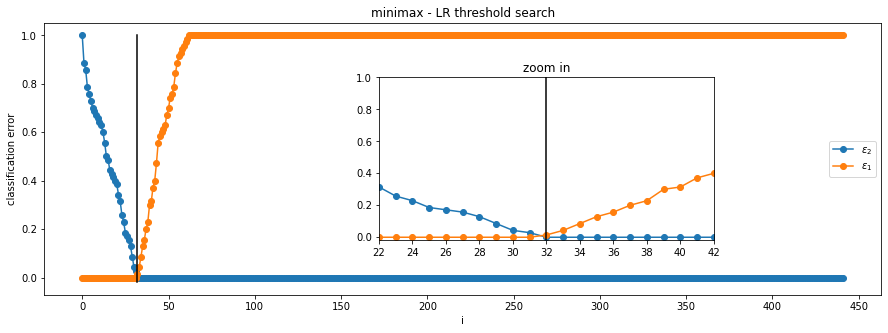

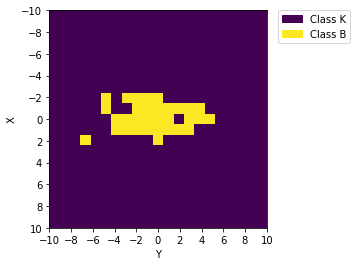

In [5]:
# the optimal Minimax strategy
q_minimax_discrete, opt_i, eps1, eps2 = minimax_strategy_discrete(D1, D2)

# plot the search for the strategy
# plt.figure()
plot_lr_threshold(eps1, eps2, opt_i)
plt.savefig('minimax_lr_search_discrete.png')

# show the strategy
plot_discrete_strategy(q_minimax_discrete, letters)
plt.savefig('minimax_strategy_discrete.png')

In [6]:
# classification
images_test_2classes, labels_gt = create_test_set(images_tst, labels_tst, letters, alphabet)

labels_estimated_discrete = classify_discrete(images_test_2classes, q_minimax_discrete)

error_discrete = classification_error_discrete(images_test_2classes, labels_gt, q_minimax_discrete)

Error discrete: 0.0667


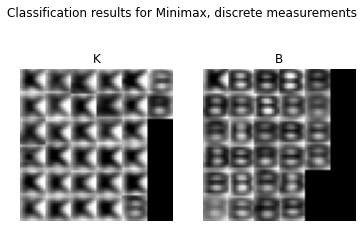

In [7]:
# classification visualisation
fig = plt.figure()
show_classification(images_test_2classes, labels_estimated_discrete, letters)
plt.suptitle('Classification results for Minimax, discrete measurements')
plt.savefig('minimax_classif_discrete.png')

print('Error discrete: {:.4f}'.format(error_discrete))

## Continuous

In [7]:
# D1 priors
p_1 = np.linspace(0,1,101)

# zero one loss function (every error is penalised equally independent of the class)
W = np.array([[0, 1], [1, 0]])

In [15]:
# fill your initials
letters = "AB"
D1 = cont[letters[0]].copy()
D2 = cont[letters[1]].copy()

#### Visualisation

In [16]:
D1['Prior'] = 0.3
D2['Prior'] = 1 - D1['Prior']
q_p1_fix = find_strategy_2normal(D1, D2)
risk_fix = risk_fix_q_cont(D1, D2, p_1, q_p1_fix)
print(max(risk_fix))

0.4109549204885703


In [80]:
D1['Prior'] = 0.3
D2['Prior'] = 1 - D1['Prior']
worst_risk = worst_risk_cont(D1, D2, [0.3])
# _, worst_risk = minimax_strategy_cont(D1, D2)
print(worst_risk)

[0.02973585]


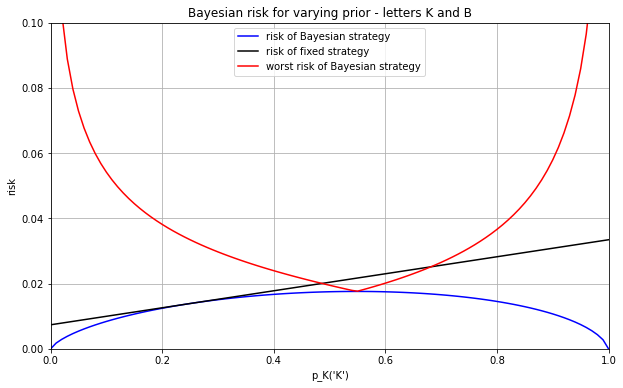

In [74]:
plt.figure(figsize=(10,6))
plt.plot(p_1, risk, 'b')
plt.plot(p_1, risk_fix, 'k')
plt.plot(p_1, worst_risk ,'r')

plt.ylim([0, 0.1])
plt.xlim([0, 1.0])
plt.ylabel('risk')
plt.xlabel('p_K(\'{}\')'.format(letters[0]))
plt.legend(['risk of Bayesian strategy', 'risk of fixed strategy', 'worst risk of Bayesian strategy'])
plt.title('Bayesian risk for varying prior - letters {} and {}'.format(letters[0], letters[1]))
plt.grid('on')
# plt.savefig('plots_cont_' + letters.lower() + '.png')
plt.savefig('plots_cont.png')

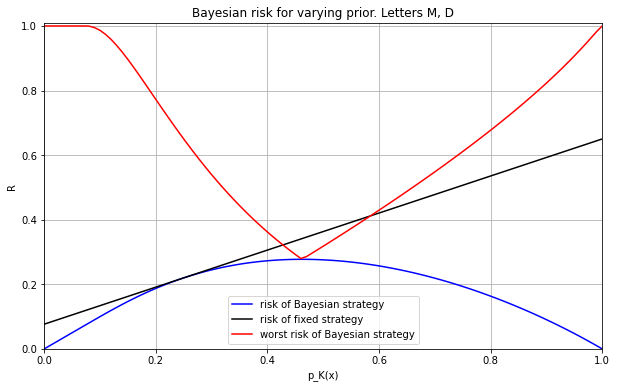

In [49]:
plot_bayesian_risk_for_varying_prior(letters, risk, risk_fix, worst_risk)
plt.savefig('plots_cont_' + letters.lower() + '.png')
plt.savefig('plots_cont.png')

In [18]:
def plot_bayesian_risk_for_varying_prior(letters, risk, risk_fix, worst_risk):
    plt.figure(figsize=(10,6))
    plt.plot(p_1, risk, 'b')
    plt.plot(p_1, risk_fix, 'k')
    plt.plot(p_1, worst_risk ,'r');

    plt.ylim([0, 1.01])
    plt.xlim([0, 1.0])
    plt.ylabel('R')
    plt.xlabel('p_K(x)')
    plt.legend(['risk of Bayesian strategy', 'risk of fixed strategy', 'worst risk of Bayesian strategy'])
    plt.title('Bayesian risk for varying prior. Letters {}, {}'.format(letters[0], letters[1]))
    plt.grid('on')

In [22]:
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(letter1=alphabet, letter2=alphabet, prior1_fixed=(0.,1.,0.01))
    def plot_bayes_cont_interactive(letter1='M', letter2='D', prior1_fixed=0.25):
        D1 = cont[letter1]
        D2 = cont[letter2]
        letters = letter1 + letter2
        
        risk = np.zeros_like(p_1)
        for i in range(p_1.size):
            D1['Prior'] = float(p_1[i])
            D2['Prior'] = float(1 - p_1[i])
            q = find_strategy_2normal(D1, D2)
            risk[i] = bayes_risk_2normal(D1, D2, q)
        
        D1['Prior'] = prior1_fixed
        D2['Prior'] = 1 - D1['Prior']
        q_p1_fix = find_strategy_2normal(D1, D2)
        risk_fix = risk_fix_q_cont(D1, D2, p_1, q_p1_fix)
        worst_risk = worst_risk_cont(D1, D2, p_1)
        plot_bayesian_risk_for_varying_prior(letters, risk, risk_fix, worst_risk)

except ImportError:
    print('Optional feature.')

interactive(children=(Dropdown(description='letter1', index=10, options=('A', 'B', 'C', 'D', 'E', 'H', 'I', 'J…

#### Classification

In [75]:
q_minimax_cont, risk_minimax_cont = minimax_strategy_cont(D1, D2)

print('q: {}'.format(q_minimax_cont))
print('risk: {}'.format(risk_minimax_cont))
# labels_estimated_cont = classify_2normal(images_test_set, q_minimax_cont)
                                  
# error_cont = classification_error_2normal(images_test_set, labels_test_set, q_minimax_cont)
images_test_cont, labels_test_cont = create_test_set(images_tst, labels_tst, letters, alphabet)

labels_estimated_cont = classify_2normal(images_test_cont, q_minimax_cont)
                                  
error_cont = classification_error_2normal(images_test_cont, labels_test_cont, q_minimax_cont)

q: {'t1': -1511.318562514914, 't2': 8840.463768949328, 'decision': array([0, 1, 0], dtype=int32)}
risk: [0.0176192]


/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Error cont: 0.0333


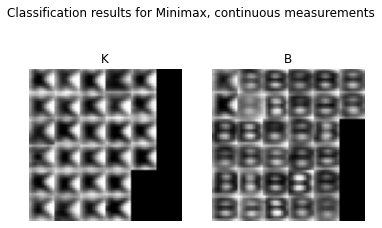

In [76]:
fig = plt.figure()
show_classification(images_test_cont, labels_estimated_cont, letters)
plt.suptitle('Classification results for Minimax, continuous measurements')
# plt.savefig('minimax_classif_cont_' + letters.lower() + '.png')
plt.savefig('minimax_classif_cont.png')
print('Error cont: {:.4f}'.format(error_cont))